In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist  # набор для работы


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [7]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

4431872/4422102 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)


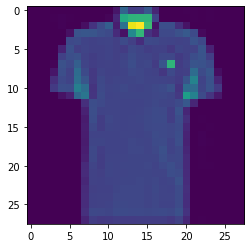

0


In [9]:
plt.imshow(train_imagesi[202,:,:])
plt.show()
print(train_labels[202])

In [10]:
train_images[202,:]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.88188976, -0.36220472, -0.63779528, -0.62992126,
       -0.45669291, -0.79527559, -1.        , -1.        , -1.        ,
       -0.99212598, -0.99212598, -1.        , -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.99212598, -0.98425197, -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -0.97637795, -0.77952756,
        0.22834646,  0.30708661,  0.31496063,  0.31496063, -0.5984252 ,
       -1.        , -1.        , -1.        , -1.        , -0.99212598,
       -1.        , -0.99212598, -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.98425197, -1.        , -1.        , -0.92125984, -0.70866142,
       -0.54330709, -0.4015748 , -0.83464567, -0.2519685 ,  0.94

### 2-слойная модель

Epoch 1/15
80/80 [==============================] - 1s 11ms/step - loss: 1.2319 - accuracy: 0.6811 - val_loss: 0.8434 - val_accuracy: 0.7752
Epoch 2/15
80/80 [==============================] - 1s 8ms/step - loss: 0.7166 - accuracy: 0.8052 - val_loss: 0.6234 - val_accuracy: 0.8213
Epoch 3/15
80/80 [==============================] - 1s 8ms/step - loss: 0.5617 - accuracy: 0.8347 - val_loss: 0.5237 - val_accuracy: 0.8381
Epoch 4/15
80/80 [==============================] - 1s 8ms/step - loss: 0.4834 - accuracy: 0.8502 - val_loss: 0.4677 - val_accuracy: 0.8519
Epoch 5/15
80/80 [==============================] - 1s 8ms/step - loss: 0.4377 - accuracy: 0.8606 - val_loss: 0.4425 - val_accuracy: 0.8550
Epoch 6/15
80/80 [==============================] - 1s 8ms/step - loss: 0.4055 - accuracy: 0.8686 - val_loss: 0.4175 - val_accuracy: 0.8572
Epoch 7/15
80/80 [==============================] - 1s 8ms/step - loss: 0.3790 - accuracy: 0.8756 - val_loss: 0.3920 - val_accuracy: 0.8671
Epoch 8/15
80/80 [=

80/80 [==============================] - 1s 10ms/step - loss: 0.2629 - accuracy: 0.9052 - val_loss: 0.3223 - val_accuracy: 0.8851
Epoch 15/15
80/80 [==============================] - 1s 10ms/step - loss: 0.2548 - accuracy: 0.9075 - val_loss: 0.3171 - val_accuracy: 0.8861
Epoch 1/15
80/80 [==============================] - 2s 15ms/step - loss: 0.7952 - accuracy: 0.7285 - val_loss: 0.4988 - val_accuracy: 0.8184
Epoch 2/15
80/80 [==============================] - 1s 14ms/step - loss: 0.4591 - accuracy: 0.8345 - val_loss: 0.4428 - val_accuracy: 0.8405
Epoch 3/15
80/80 [==============================] - 1s 15ms/step - loss: 0.4043 - accuracy: 0.8547 - val_loss: 0.3980 - val_accuracy: 0.8582
Epoch 4/15
80/80 [==============================] - 1s 12ms/step - loss: 0.3707 - accuracy: 0.8672 - val_loss: 0.3772 - val_accuracy: 0.8662
Epoch 5/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3496 - accuracy: 0.8732 - val_loss: 0.3715 - val_accuracy: 0.8692
Epoch 6/15
80/80 [=====

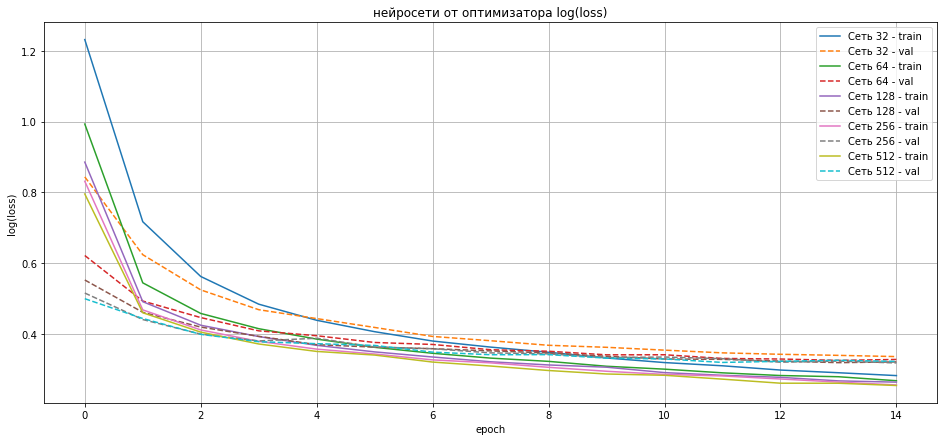

In [14]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

result2 = []

for neuron_num in [32, 64, 128, 256, 512]:
  # Build the model.
  model2 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
#  Dense(110, activation='relu'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
  ])

  # Compile the model.
  model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history2 = model2.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
  )

  # накопление результатов
  model_name = f'Сеть {neuron_num} нейрона'
  model_accuracy = history2.history['accuracy'][epochs-1]
  model_val_accuracy = history2.history['val_accuracy'][epochs-1]
  result2.append([model_name,model_accuracy, model_val_accuracy])

  # картинки
  plt.plot(epoch,history2.history['loss'],'-',label = f'Сеть {neuron_num} - train')
  plt.plot(epoch,history2.history['val_loss'],'--',label = f'Сеть {neuron_num} - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [15]:
# Оценка accuracy
pd.DataFrame(result2, columns=['model_name','model_accuracy','model_val_accuracy']).sort_values('model_val_accuracy',ascending=False).head(5)

,model_name,model_accuracy,model_val_accuracy
3,Сеть 256 нейрона,0.907479,0.886083
4,Сеть 512 нейрона,0.907313,0.882500
2,Сеть 128 нейрона,0.904562,0.882083
1,Сеть 64 нейрона,0.904875,0.881167
0,Сеть 32 нейрона,0.902292,0.880833


В двухслойной модели увеличение ширины слоя повышает точность обучения на тренировочной выборке. Наилучшая точность на валидационной выборке - при 264 нейронах в скрытом слое.

In [23]:
result_dense = []

# Build the model.
model2_64 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model2_64.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history2_64 = model2_64.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores2_64 = model2_64.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'2-слойная сеть'
mod_accuracy = history2_64.history['accuracy'][epochs-1]
mod_val_accuracy = history2_64.history['val_accuracy'][epochs-1]
test_accuracy = test_scores2_64[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 11ms/step - loss: 0.9843 - accuracy: 0.7175 - val_loss: 0.6165 - val_accuracy: 0.8019
Epoch 2/15
80/80 [==============================] - 1s 9ms/step - loss: 0.5420 - accuracy: 0.8255 - val_loss: 0.4943 - val_accuracy: 0.8361
Epoch 3/15
80/80 [==============================] - 1s 8ms/step - loss: 0.4613 - accuracy: 0.8445 - val_loss: 0.4432 - val_accuracy: 0.8458
Epoch 4/15
80/80 [==============================] - 1s 9ms/step - loss: 0.4167 - accuracy: 0.8574 - val_loss: 0.4149 - val_accuracy: 0.8548
Epoch 5/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3875 - accuracy: 0.8662 - val_loss: 0.3919 - val_accuracy: 0.8632
Epoch 6/15
80/80 [==============================] - 1s 8ms/step - loss: 0.3655 - accuracy: 0.8730 - val_loss: 0.3744 - val_accuracy: 0.8685
Epoch 7/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3511 - accuracy: 0.8762 - val_loss: 0.3653 - val_accuracy: 0.8723
Epoch 8/15
80/80 [=

### 3-слойная модель

In [24]:
# Build the model.
model3 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history3 = model3.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores3 = model3.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'3-слойная сеть'
mod_accuracy = history3.history['accuracy'][epochs-1]
mod_val_accuracy = history3.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 12ms/step - loss: 1.0418 - accuracy: 0.6756 - val_loss: 0.6207 - val_accuracy: 0.7924
Epoch 2/15
80/80 [==============================] - 1s 10ms/step - loss: 0.5370 - accuracy: 0.8229 - val_loss: 0.4842 - val_accuracy: 0.8347
Epoch 3/15
80/80 [==============================] - 1s 9ms/step - loss: 0.4452 - accuracy: 0.8493 - val_loss: 0.4458 - val_accuracy: 0.8470
Epoch 4/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3994 - accuracy: 0.8627 - val_loss: 0.3967 - val_accuracy: 0.8612
Epoch 5/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3725 - accuracy: 0.8704 - val_loss: 0.3803 - val_accuracy: 0.8651
Epoch 6/15
80/80 [==============================] - 1s 10ms/step - loss: 0.3518 - accuracy: 0.8773 - val_loss: 0.3715 - val_accuracy: 0.8674
Epoch 7/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3343 - accuracy: 0.8826 - val_loss: 0.3625 - val_accuracy: 0.8688
Epoch 8/15
80/80 

### 5-слойная модель

In [25]:
# Build the model.
model5 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history5 = model5.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores5 = model5.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'5-слойная сеть'
mod_accuracy = history5.history['accuracy'][epochs-1]
mod_val_accuracy = history5.history['val_accuracy'][epochs-1]
test_accuracy = test_scores5[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 2s 15ms/step - loss: 0.9862 - accuracy: 0.7174 - val_loss: 0.5480 - val_accuracy: 0.8311
Epoch 2/15
80/80 [==============================] - 1s 12ms/step - loss: 0.4831 - accuracy: 0.8438 - val_loss: 0.4512 - val_accuracy: 0.8494
Epoch 3/15
80/80 [==============================] - 1s 12ms/step - loss: 0.4072 - accuracy: 0.8634 - val_loss: 0.4151 - val_accuracy: 0.8539
Epoch 4/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3703 - accuracy: 0.8733 - val_loss: 0.3834 - val_accuracy: 0.8663
Epoch 5/15
80/80 [==============================] - 1s 12ms/step - loss: 0.3439 - accuracy: 0.8793 - val_loss: 0.3527 - val_accuracy: 0.8769
Epoch 6/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3120 - accuracy: 0.8918 - val_loss: 0.3535 - val_accuracy: 0.8761
Epoch 7/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3030 - accuracy: 0.8928 - val_loss: 0.3600 - val_accuracy: 0.8700
Epoch 8/15
80

### 10-слойная модель

In [26]:
# Build the model.
model10 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), 
  Dense(256, activation='tanh'),
  Dense(128, activation='tanh'),
  Dense(60, activation='sigmoid'),
  Dense(60, activation='relu'),
  Dense(64, activation='tanh'),
  Dense(128, activation='tanh'),
  Dense(256, activation='relu'),
  Dense(64, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model10.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history10 = model10.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores10 = model10.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'10-слойная сеть'
mod_accuracy = history10.history['accuracy'][epochs-1]
mod_val_accuracy = history10.history['val_accuracy'][epochs-1]
test_accuracy = test_scores10[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 3s 19ms/step - loss: 1.2836 - accuracy: 0.5934 - val_loss: 0.7111 - val_accuracy: 0.7753
Epoch 2/15
80/80 [==============================] - 1s 16ms/step - loss: 0.6111 - accuracy: 0.7928 - val_loss: 0.5695 - val_accuracy: 0.7972
Epoch 3/15
80/80 [==============================] - 1s 16ms/step - loss: 0.4963 - accuracy: 0.8315 - val_loss: 0.4841 - val_accuracy: 0.8378
Epoch 4/15
80/80 [==============================] - 1s 17ms/step - loss: 0.4255 - accuracy: 0.8586 - val_loss: 0.4323 - val_accuracy: 0.8551
Epoch 5/15
80/80 [==============================] - 1s 16ms/step - loss: 0.3860 - accuracy: 0.8696 - val_loss: 0.4063 - val_accuracy: 0.8596
Epoch 6/15
80/80 [==============================] - 1s 16ms/step - loss: 0.3586 - accuracy: 0.8771 - val_loss: 0.3880 - val_accuracy: 0.8677
Epoch 7/15
80/80 [==============================] - 1s 17ms/step - loss: 0.3419 - accuracy: 0.8811 - val_loss: 0.3859 - val_accuracy: 0.8670
Epoch 8/15
80

Text(0.5, 1.0, 'Потери от эпох')

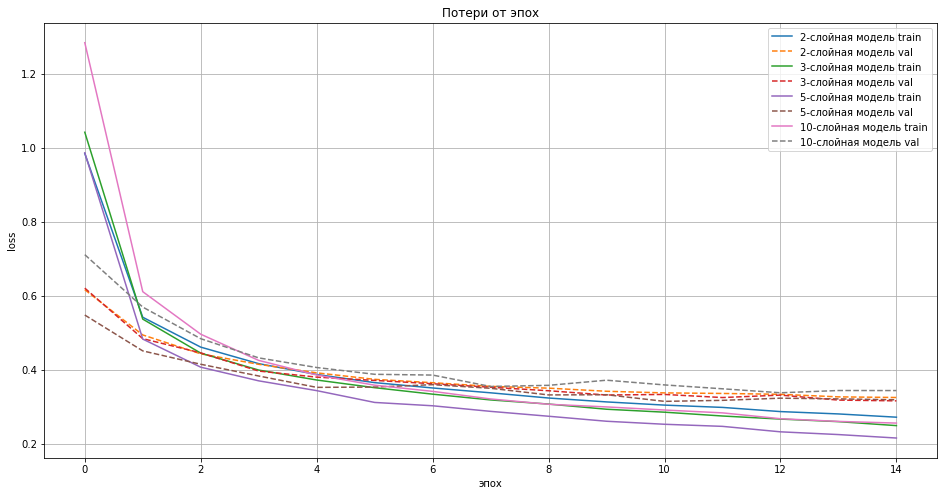

In [27]:
plt.figure(figsize=(16, 8))

plt.plot(history2_64.history['loss'],'-', label='2-слойная модель train')
plt.plot(history2_64.history['val_loss'],'--', label='2-слойная модель val')
plt.plot(history3.history['loss'],'-', label='3-слойная модель train')
plt.plot(history3.history['val_loss'],'--', label='3-слойная модель val')
plt.plot(history5.history['loss'],'-', label='5-слойная модель train')
plt.plot(history5.history['val_loss'],'--', label='5-слойная модель val')
plt.plot(history10.history['loss'],'-', label='10-слойная модель train')
plt.plot(history10.history['val_loss'],'--', label='10-слойная модель val')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох')

In [29]:
# Оценка accuracy
pd.DataFrame(result_dense, columns=['mod_name','mod_accuracy','mod_val_accuracy', 'test_accuracy']).sort_values('mod_val_accuracy',ascending=False).head(5)

,mod_name,mod_accuracy,mod_val_accuracy,test_accuracy
2,5-слойная сеть,0.923000,0.889250,0.8812
1,3-слойная сеть,0.910542,0.885583,0.8784
0,2-слойная сеть,0.903646,0.884250,0.8745
3,10-слойная сеть,0.909604,0.881667,0.8687


В 5-слойной модели точность выше.

### Эксперимент с разными оптимизаторами для одной начальной модели:


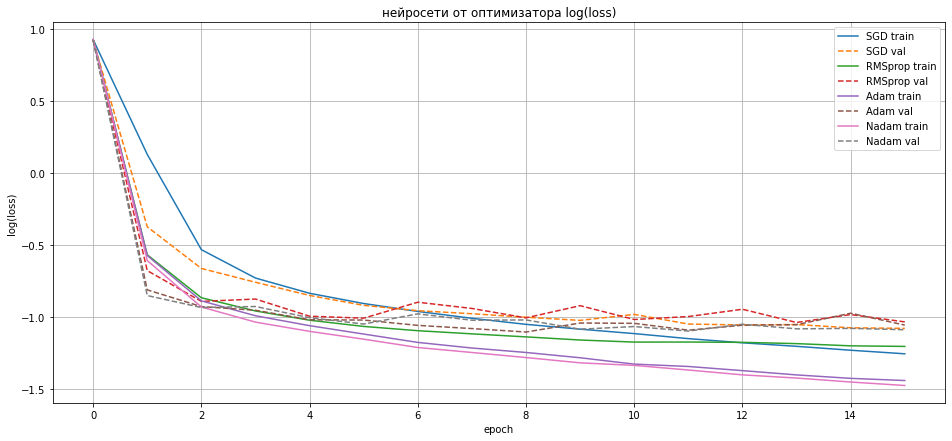

In [36]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

result=[]

# будем изменять оптимизаторы
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='relu'),
                      Dense(256, activation='tanh'),
                      Dense(128, activation='tanh'),
                      Dense(64, activation='sigmoid'),
                      Dense(10, activation='softmax'),
                      ])
  
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  # накопление результатов
  method_name = modeli.optimizer.get_config()['name']
  method_accuracy = hh.history['accuracy'][14]
  method_val_accuracy = hh.history['val_accuracy'][14]
  result.append([method_name,method_accuracy, method_val_accuracy])


  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [37]:
# Оценка accuracy
import pandas as pd
pd.DataFrame(result, columns=['method_name','method_accuracy','method_val_accuracy']).sort_values('method_val_accuracy',ascending=False).head(4)

,method_name,method_accuracy,method_val_accuracy
3,Nadam,0.914500,0.887750
2,Adam,0.911667,0.879250
1,RMSprop,0.894813,0.878750
0,SGD,0.897479,0.878083


In [38]:
modeli.optimizer.get_config()

{'name': 'Nadam',
 'learning_rate': 0.001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

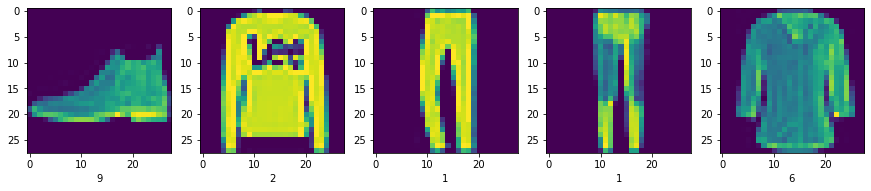

In [39]:
N = 5
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()

In [40]:
y_pred_class

array([9, 2, 1, 1, 6], dtype=int64)

In [43]:
test_pred = np.argmax(modeli.predict(test_images), axis=1)

In [44]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.96      0.97      0.97      1000
           2       0.86      0.75      0.80      1000
           3       0.90      0.85      0.87      1000
           4       0.80      0.83      0.82      1000
           5       0.98      0.93      0.95      1000
           6       0.67      0.72      0.69      1000
           7       0.91      0.97      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [45]:
print(confusion_matrix(test_labels, test_pred))

[[869   1  11  17   2   2  92   0   6   0]
 [  4 974   1  12   3   0   4   0   2   0]
 [ 16   5 749  12  98   0 114   0   6   0]
 [ 33  24   5 846  37   0  49   0   6   0]
 [  3   6  57  22 827   0  81   0   4   0]
 [  0   0   0   0   0 931   0  43   3  23]
 [133   1  50  27  57   0 718   0  14   0]
 [  0   0   0   0   0  12   0 967   0  21]
 [  7   0   2   5   4   3  12   5 962   0]
 [  0   0   0   0   0   6   1  43   0 950]]


In [46]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')